In [4]:
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

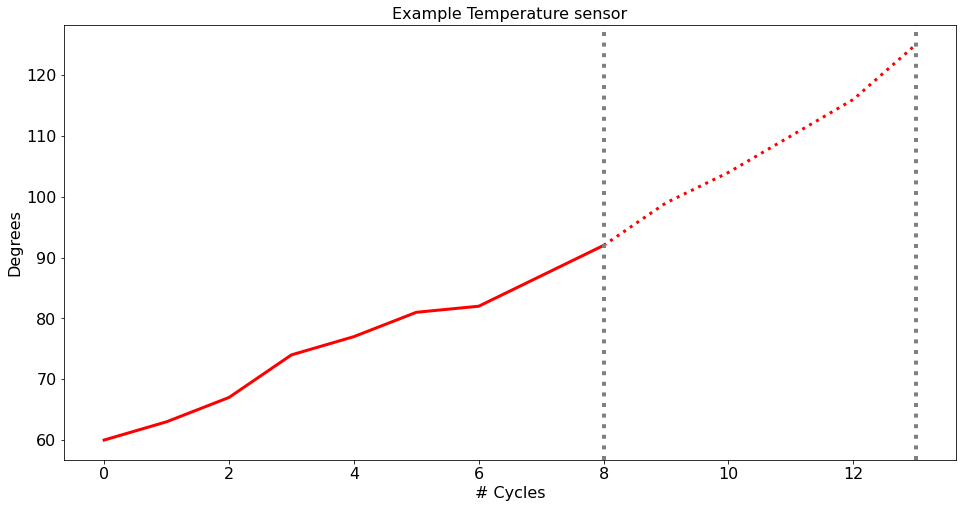

In [7]:
A=[60,63,67,74,77,81,82,87,92]
B=[92,99,104,110,116,125]
C = np.append(np.repeat(np.nan, len(A)-1), B)
plt.figure(figsize = (16, 8))
plt.plot(A, color='red', linewidth=3)
plt.plot(C, 'r:', linewidth=3)
plt.axvline(x=len(A)-1, color='grey', linestyle=':', linewidth=4)
plt.axvline(x=len(C)-1, color='grey', linestyle=':', linewidth=4)
plt.title('Example Temperature sensor', fontsize=16)
plt.xlabel('# Cycles', fontsize=16)
plt.ylabel('Degrees', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [8]:
train = pd.read_csv('train_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
test = pd.read_csv('test_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL = pd.read_csv('RUL_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'train_FD001.csv'

In [10]:

# define filepath to read data
dir_path = './CMAPSSData/'

train = pd.read_csv('train_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
test = pd.read_csv('test_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL = pd.read_csv('RUL_FD001.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'train_FD001.csv'

In [11]:
# define filepath to read data
dir_path = './CMAPSSData/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

# inspect first few rows
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.001,-0.000,100.000,518.670,641.820,1589.700,1400.600,14.620,...,521.660,2388.020,8138.620,8.419,0.030,392,2388,100.000,39.060,23.419
1,1,2,0.002,-0.000,100.000,518.670,642.150,1591.820,1403.140,14.620,...,522.280,2388.070,8131.490,8.432,0.030,392,2388,100.000,39.000,23.424
2,1,3,-0.004,0.000,100.000,518.670,642.350,1587.990,1404.200,14.620,...,522.420,2388.030,8133.230,8.418,0.030,390,2388,100.000,38.950,23.344
3,1,4,0.001,0.000,100.000,518.670,642.350,1582.790,1401.870,14.620,...,522.860,2388.080,8133.830,8.368,0.030,392,2388,100.000,38.880,23.374
4,1,5,-0.002,-0.000,100.000,518.670,642.370,1582.850,1406.220,14.620,...,522.190,2388.040,8133.800,8.429,0.030,393,2388,100.000,38.900,23.404


In [12]:
train[index_names].describe()

,unit_nr,time_cycles
count,20631.000,20631.000
mean,51.507,108.808
std,29.228,68.881
min,1.000,1.000
25%,26.000,52.000
50%,52.000,104.000
75%,77.000,156.000
max,100.000,362.000


In [13]:
train[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000,20631.000,20631.000
mean,-0.000,0.000,100.000
std,0.002,0.000,0.000
min,-0.009,-0.001,100.000
25%,-0.002,-0.000,100.000
50%,0.000,0.000,100.000
75%,0.002,0.000,100.000
max,0.009,0.001,100.000


In [14]:
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.000,518.670,0.000,518.670,518.670,518.670,518.670,518.670
s_2,20631.000,642.681,0.500,641.210,642.325,642.640,643.000,644.530
s_3,20631.000,1590.523,6.131,1571.040,1586.260,1590.100,1594.380,1616.910
s_4,20631.000,1408.934,9.001,1382.250,1402.360,1408.040,1414.555,1441.490
s_5,20631.000,14.620,0.000,14.620,14.620,14.620,14.620,14.620
s_6,20631.000,21.610,0.001,21.600,21.610,21.610,21.610,21.610
s_7,20631.000,553.368,0.885,549.850,552.810,553.440,554.010,556.060
s_8,20631.000,2388.097,0.071,2387.900,2388.050,2388.090,2388.140,2388.560
s_9,20631.000,9065.243,22.083,9021.730,9053.100,9060.660,9069.420,9244.590
s_10,20631.000,1.300,0.000,1.300,1.300,1.300,1.300,1.300


In [15]:
def add_remaining_useful_life(df):
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [18]:
cyclestrain = train.groupby('unit_nr', as_index=False)['time_cycles'].max()
cyclestest = test.groupby('unit_nr', as_index=False)['time_cycles'].max()

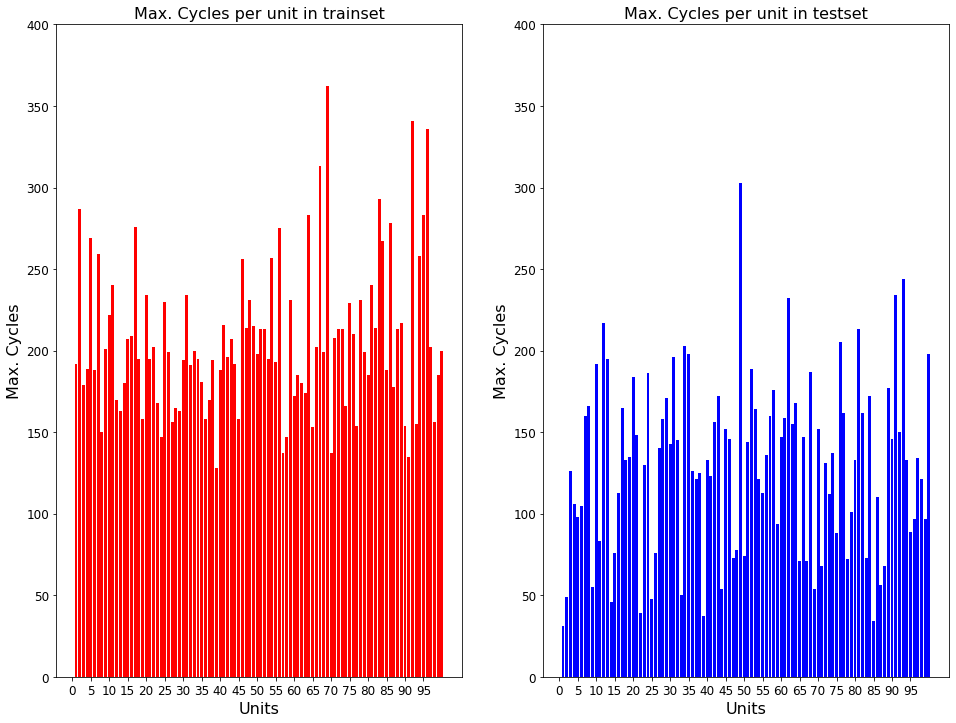

In [35]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['unit_nr'])
bars = plt.bar(list(cyclestrain['unit_nr']), cyclestrain['time_cycles'], color='red')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['unit_nr']), cyclestest['time_cycles'], color='blue')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

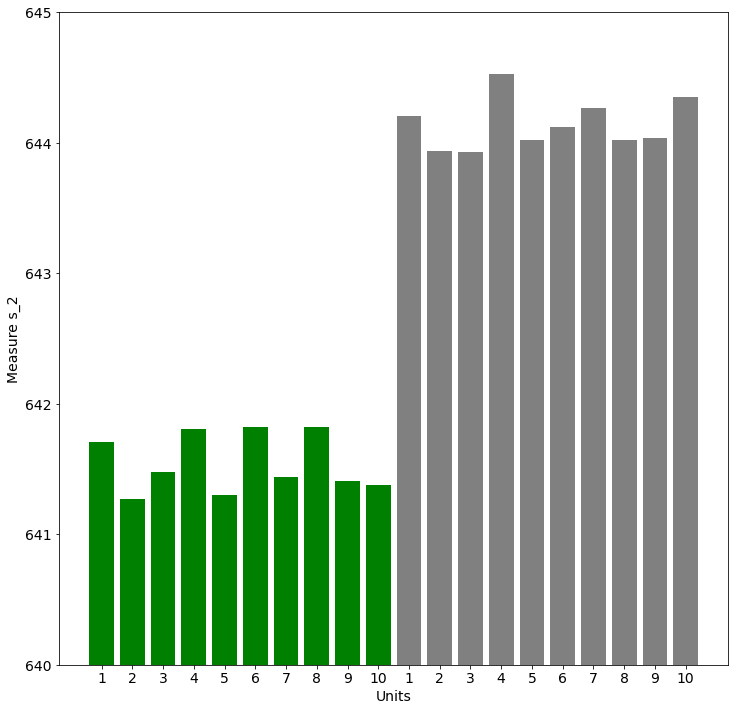

In [40]:
minb = train.groupby('unit_nr', as_index=False).min().head(10)
maxb = train.groupby('unit_nr', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)

plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('green', 10), np.repeat('gray', 10)), axis=0)
bar_labels = list(mmtable['unit_nr'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s_2'], color=col)
plt.ylim([640, 645])
plt.xlabel('Units', fontsize=14)
plt.ylabel('Measure s_2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [79]:
dir_path='./CMAPSSDATA/'
index_names=['unit_nr','time_cycles']
setting_names=['setting_1','setting_2','setting_3']
sensor_names=['s_{}'.format(i) for i in range(1,22)]
col_names= index_names+setting_names+sensor_names

train=pd.read_csv((dir_path+'train_FD001.txt'),sep='\s+',header=None,names=col_names)
test=pd.read_csv((dir_path+'test_FD001.txt'),sep='\s+',header=None,names=col_names)
y_test=pd.read_csv((dir_path+'RUL_FD001.txt'),sep='\s+',header=None,names=['RUL'])

train.head()




,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.001,-0.000,100.000,518.670,641.820,1589.700,1400.600,14.620,...,521.660,2388.020,8138.620,8.419,0.030,392,2388,100.000,39.060,23.419
1,1,2,0.002,-0.000,100.000,518.670,642.150,1591.820,1403.140,14.620,...,522.280,2388.070,8131.490,8.432,0.030,392,2388,100.000,39.000,23.424
2,1,3,-0.004,0.000,100.000,518.670,642.350,1587.990,1404.200,14.620,...,522.420,2388.030,8133.230,8.418,0.030,390,2388,100.000,38.950,23.344
3,1,4,0.001,0.000,100.000,518.670,642.350,1582.790,1401.870,14.620,...,522.860,2388.080,8133.830,8.368,0.030,392,2388,100.000,38.880,23.374
4,1,5,-0.002,-0.000,100.000,518.670,642.370,1582.850,1406.220,14.620,...,522.190,2388.040,8133.800,8.429,0.030,393,2388,100.000,38.900,23.404


In [80]:
def add_remaining_useful_life(df):
    grouped_by_unit=df.groupby(by="unit_nr")
    max_cycle=grouped_by_unit["time_cycles"].max()
    result_frame=df.merge(max_cycle.to_frame(name='max_cycle'),left_on='unit_nr',right_index=True)
    remaining_useful_life=result_frame["max_cycle"]-result_frame["time_cycles"]
    result_frame["RUL"]=remaining_useful_life
    result_frame=result_frame.drop("max_cycle",axis=1)
    return result_frame
train=add_remaining_useful_life(train)
train[index_names+['RUL']].head()


,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [81]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = setting_names+drop_sensors
X_train = train.drop(drop_labels, axis=1)
X_test_interim = test.drop(drop_labels, axis=1)

In [82]:
remaining_sensors = X_train.columns.difference(index_names+['RUL'])
lag1 = [col + '_lag_1' for col in remaining_sensors]
X_train[lag1] = X_train.groupby('unit_nr')[remaining_sensors].shift(1)
X_train.dropna(inplace=True)
X_test_interim[lag1] = X_test_interim.groupby('unit_nr')[remaining_sensors].shift(1)
X_test_interim.dropna(inplace=True)
y_train = X_train.pop('RUL')
X_test = X_test_interim.groupby('unit_nr').last().reset_index()

In [83]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')
y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:39.367692351135005, R2:0.6709929595362338
test set RMSE:31.423109839706022, R2:0.42820706786532714


In [85]:
def add_lagged_variables(df_input, nr_of_lags, columns):
    df = df_input.copy()
    for i in range(nr_of_lags):
        lagged_columns = [col + '_lag_{}'.format(i+1) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
    df.dropna(inplace=True)
    return df

In [86]:
def add_specific_lags(df_input, list_of_lags, columns):
    df = df_input.copy()
    for i in list_of_lags:
        lagged_columns = [col + '_lag_{}'.format(i) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i)
    df.dropna(inplace=True)
    return df

In [87]:

from statsmodels.tsa.stattools import adfuller

test_series = train.loc[train['unit_nr']==1, 's_7']
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))
      

single unit, single column test results
adf: -2.276666927948019 
pvalue: 0.17960380425358546
Significant: False



In [88]:
test_series = test_series.diff(1).dropna()
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results after differencing')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

single unit, single column test results after differencing
adf: -14.824168539718967 
pvalue: 1.9431018596392618e-27
Significant: True



In [89]:
def find_max_diff(series):
    maxdiff = 0
    do = True
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series, maxlag=1)
    if pvalue < 0.05:
        do = False
    
    while do:
        maxdiff += 1
        adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series.diff(maxdiff).dropna(), maxlag=1)
        if pvalue < 0.05:  # if significant, stop differencing and testing for stationarity
            do = False
    return maxdiff


def make_stationary(df_input, columns):
    df = df_input.copy()
    for unit_nr in range(1, df['unit_nr'].max()+1):
        for col in columns:
            maxdiff = find_max_diff(df.loc[df['unit_nr']==unit_nr, col])
            if maxdiff > 0:
                df.loc[df['unit_nr']==unit_nr, col] = df.loc[df['unit_nr']==unit_nr, col].diff(maxdiff)
    df.dropna(inplace=True)
    return df

In [90]:
intermediate_df = train.drop(drop_labels, axis=1)
intermediate_df = make_stationary(intermediate_df, remaining_sensors)
intermediate_df.head() 

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
1,1,2,642.150,1591.820,2.540,-0.610,-0.020,9044.070,0.020,0.620,0.050,-7.130,8.432,392.000,39.000,23.424,190
2,1,3,642.350,1587.990,1.060,0.510,0.040,9052.940,-0.220,0.140,-0.040,1.740,8.418,390.000,38.950,23.344,189
3,1,4,642.350,1582.790,-2.330,0.190,0.030,9049.480,-0.140,0.440,0.050,0.600,8.368,392.000,38.880,23.374,188
4,1,5,642.370,1582.850,4.350,-0.450,-0.050,9055.150,0.150,-0.670,-0.040,-0.030,8.429,393.000,38.900,23.404,187
5,1,6,642.100,1584.470,-7.850,0.670,-0.040,9049.680,-0.120,-0.510,-0.010,-0.950,8.411,391.000,38.980,23.367,186


In [91]:
lm = LinearRegression()
lm.fit(intermediate_df[remaining_sensors], intermediate_df['RUL'])
y_hat_train = lm.predict(intermediate_df[remaining_sensors])
evaluate(intermediate_df['RUL'], y_hat_train, 'train')

train set RMSE:51.63375613791181, R2:0.4340864011385228


In [92]:
import statsmodels.api as sm

metrics = pd.DataFrame(columns=['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags+1):
    X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
    X_train = X_train.drop(index_names, axis=1)
    y_train = X_train.pop('RUL')
    
    model = sm.OLS(y_train, sm.add_constant(X_train.values))
    result = model.fit()

    metrics = metrics.append(pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
                               columns=['rmse', 'AIC', 'BIC']),
                               ignore_index = True)

display(metrics)

,rmse,AIC,BIC
0,51.653,220271.650,220390.590
1,46.061,214530.300,214760.120
2,43.059,210753.820,211094.380
3,41.152,207898.350,208349.510
4,39.833,205574.270,206135.890
5,38.813,203528.000,204199.940
6,37.986,201667.950,202450.060
7,37.305,199952.230,200844.370
8,36.723,198338.720,199340.760
9,36.198,196782.370,197894.150


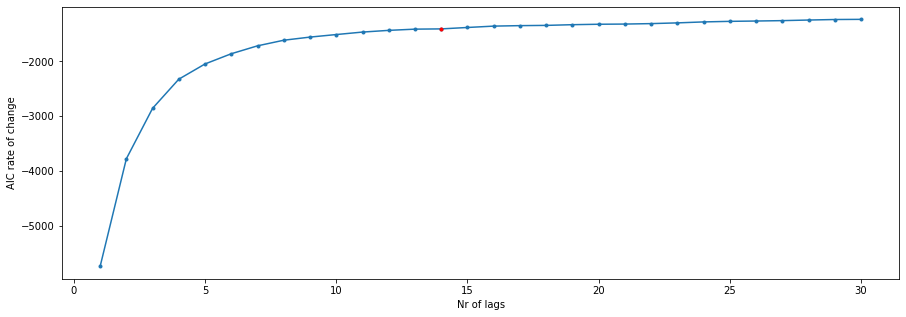

In [93]:
plt.figure(figsize=(15,5))
plt.plot(metrics['AIC'].diff(), marker='.')  # plot the difference to see where it flattens out
plt.plot(14, metrics['AIC'].diff()[14], '.r')
plt.xlabel("Nr of lags")
plt.ylabel("AIC rate of change")
plt.show()
plt.close()

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)
vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)

{'s_2': 4081069.37,
 's_3': 148827.31,
 's_4': 34450.38,
 's_7': 676636.48,
 's_8': 2591641803.36,
 's_9': 1580259.79,
 's_11': 28779.21,
 's_12': 686940.38,
 's_13': 2480791096.44,
 's_14': 1724157.4,
 's_15': 116497.33,
 's_17': 152527.42,
 's_20': 113760.29,
 's_21': 119734.69,
 'RUL': 5.11,
 's_11_lag_1': 36657.17,
 's_12_lag_1': 785930.67,
 's_13_lag_1': 2613853860.37,
 's_14_lag_1': 1926076.65,
 's_15_lag_1': 116696.91,
 's_17_lag_1': 152525.25,
 's_2_lag_1': 4074895.76,
 's_20_lag_1': 113444.5,
 's_21_lag_1': 119475.96,
 's_3_lag_1': 148979.81,
 's_4_lag_1': 38889.32,
 's_7_lag_1': 733701.46,
 's_8_lag_1': 2748462855.3,
 's_9_lag_1': 1716566.66,
 's_11_lag_2': 37805.01,
 's_12_lag_2': 780833.03,
 's_13_lag_2': 2620758747.64,
 's_14_lag_2': 1917277.53,
 's_15_lag_2': 116346.14,
 's_17_lag_2': 152686.28,
 's_2_lag_2': 4072573.42,
 's_20_lag_2': 113685.05,
 's_21_lag_2': 119653.41,
 's_3_lag_2': 149009.07,
 's_4_lag_2': 38847.79,
 's_7_lag_2': 730031.66,
 's_8_lag_2': 2753903979.86

In [95]:
from sklearn.preprocessing import StandardScaler

intermediate_df = train.drop(drop_labels, axis=1)
scaler = StandardScaler()
scaler.fit(intermediate_df[remaining_sensors])
intermediate_df[remaining_sensors] = scaler.transform(intermediate_df[remaining_sensors])

intermediate_df = make_stationary(intermediate_df, remaining_sensors)

X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)

{'s_2': 2.58,
 's_3': 2.31,
 's_4': 2.09,
 's_7': 2.21,
 's_8': 2.39,
 's_9': 4.15,
 's_11': 1.9,
 's_12': 1.97,
 's_13': 2.37,
 's_14': 4.75,
 's_15': 2.55,
 's_17': 2.47,
 's_20': 2.64,
 's_21': 2.72,
 'RUL': 2.34,
 's_11_lag_1': 2.39,
 's_12_lag_1': 2.22,
 's_13_lag_1': 2.47,
 's_14_lag_1': 5.27,
 's_15_lag_1': 2.51,
 's_17_lag_1': 2.42,
 's_2_lag_1': 2.54,
 's_20_lag_1': 2.59,
 's_21_lag_1': 2.67,
 's_3_lag_1': 2.27,
 's_4_lag_1': 2.32,
 's_7_lag_1': 2.36,
 's_8_lag_1': 2.51,
 's_9_lag_1': 4.48,
 's_11_lag_2': 2.42,
 's_12_lag_2': 2.18,
 's_13_lag_2': 2.45,
 's_14_lag_2': 5.22,
 's_15_lag_2': 2.47,
 's_17_lag_2': 2.39,
 's_2_lag_2': 2.49,
 's_20_lag_2': 2.55,
 's_21_lag_2': 2.63,
 's_3_lag_2': 2.24,
 's_4_lag_2': 2.29,
 's_7_lag_2': 2.31,
 's_8_lag_2': 2.48,
 's_9_lag_2': 4.42,
 's_11_lag_3': 2.35,
 's_12_lag_3': 2.13,
 's_13_lag_3': 2.42,
 's_14_lag_3': 5.14,
 's_15_lag_3': 2.43,
 's_17_lag_3': 2.35,
 's_2_lag_3': 2.45,
 's_20_lag_3': 2.53,
 's_21_lag_3': 2.59,
 's_3_lag_3': 2.2,


In [96]:
lags = 9

# prep data
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_lagged_variables(X_train_interim, lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_lagged_variables(X_test_interim, lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)  # apply clipped RUL from last post
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.80233928213837, R2:0.7523208224684113
test set RMSE:21.14895857012398, R2:0.7409888687595052


In [97]:

specific_lags = [1,2,3,4,5,10,20]
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.742950740267165, R2:0.7542608298904978
test set RMSE:20.852234864407464, R2:0.7482058292992069


In [98]:
specific_lags = [1,2,3,4,5,10,20,30]
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.347224823881536, R2:0.7628024987213586
test set RMSE:21.0690851291658, R2:0.7429415931694926


In [99]:
specific_lags = [1,2,3,4,5,6,7,8,9]
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.80233928213837, R2:0.7523208224684113
test set RMSE:21.14895857012398, R2:0.7409888687595052


In [100]:
specific_lags = [1,2,3,4,5,6]
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.90637432325753, R2:0.7494769402135674
test set RMSE:21.533252412783433, R2:0.7314904614264773


In [101]:
specific_lags = [1,2,3,4,5]
X_train_interim = train.drop(drop_labels, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.966258396221928, R2:0.7478992967119864
test set RMSE:21.76424918730387, R2:0.7256987194128282
